# **1. Import Libraries**

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# **2. Load and Preview Data**

In [2]:
# Read data from URL
url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/Startups.csv'
data = pd.read_csv(url)

# Print first 5 rows of data
print(data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [3]:
# Get summary statistics for numerical columns
description = data.describe()
print(f"\nSummary Statistics:\n{description}\n")


Summary Statistics:
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000



# **3. Visualize Correlations using Heatmap**

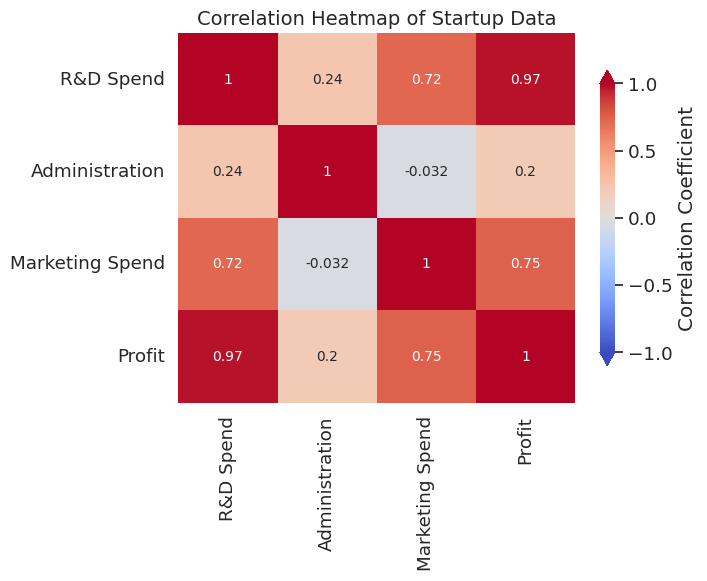

In [5]:
# Visualize correlation between columns using heatmap
sns.set(font_scale=1.2)
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm', annot=True, annot_kws={"fontsize":10}, vmin=-1, vmax=1, cbar_kws={'orientation': 'vertical', 'shrink': 0.8, 'label': 'Correlation Coefficient', 'ticks': [-1, -0.5, 0, 0.5, 1], 'extend': 'both'})

# Add title to plot
plt.title('Correlation Heatmap of Startup Data', fontsize=14)

plt.show()

# **4. Prepare Data for Model Training**

In [6]:
# Prepare data for training
x = data[["R&D Spend", "Administration", "Marketing Spend"]]
y = data["Profit"]

# Convert x and y to NumPy arrays
x = x.to_numpy()
y = y.to_numpy()

# Reshape y to have a single column
y = y.reshape(-1, 1)

# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# **5. Train the Linear Regression Model and Predict Profits**

In [7]:
# Train the model
model = LinearRegression()
model.fit(xtrain, ytrain)

# Predict profits for the test data
ypred = model.predict(xtest)

# **6. Display Predicted Profits**

In [8]:
# Combine actual and predicted profit values into a DataFrame
results = pd.DataFrame({"Actual Profit": ytest.flatten(), "Predicted Profit": ypred.flatten()})

# Calculate the difference between actual and predicted profit values
results["Difference"] = results["Actual Profit"] - results["Predicted Profit"]

# Display the first 5 rows of the results DataFrame
print(results.head())

   Actual Profit  Predicted Profit    Difference
0      134307.35     126703.027165   7604.322835
1       81005.76      84894.750816  -3888.990816
2       99937.59      98893.418160   1044.171840
3       64926.08      46501.708150  18424.371850
4      125370.37     129128.397344  -3758.027344


In [9]:
# Get feature values for the test data
test_data_indices = [data.index[data["Profit"] == value].tolist()[0] for value in ytest.flatten()]
test_data_features = data.loc[test_data_indices, ["R&D Spend", "Administration", "Marketing Spend"]]

# Combine feature values, actual profit, and predicted profit values into a DataFrame
results = pd.DataFrame({"R&D Spend": test_data_features["R&D Spend"].values,
                        "Administration": test_data_features["Administration"].values,
                        "Marketing Spend": test_data_features["Marketing Spend"].values,
                        "Actual Profit": ytest.flatten(),
                        "Predicted Profit": ypred.flatten()})

# Calculate the difference between actual and predicted profit values
results["Difference"] = results["Actual Profit"] - results["Predicted Profit"]

# Format numbers to have thousands separators and round to two decimal places
for column in results.columns:
    if results[column].dtype in ['float64', 'int64']:
        results[column] = results[column].apply(lambda x: f"{x:,.2f}")

# Reset the index to start from 1
results.index += 1

# Display the first 5 rows of the results DataFrame
print("Comparison of Actual Profit and Predicted Profit for Startup Companies:\n")
print(results.head())

Comparison of Actual Profit and Predicted Profit for Startup Companies:

   R&D Spend Administration Marketing Spend Actual Profit Predicted Profit  \
1  91,992.39     135,495.07      252,664.93    134,307.35       126,703.03   
2  38,558.51      82,982.09      174,999.30     81,005.76        84,894.75   
3  61,994.48     115,641.28       91,131.24     99,937.59        98,893.42   
4   1,000.23     124,153.04        1,903.93     64,926.08        46,501.71   
5  94,657.16     145,077.58      282,574.31    125,370.37       129,128.40   

  Difference  
1   7,604.32  
2  -3,888.99  
3   1,044.17  
4  18,424.37  
5  -3,758.03  
